# Exercice TicTacTrip

*Arthur Lemerle, 5 avril 2022*

Sans faire d'introduction longue et ennuyeuse, je voulais tout de même faire quelques remarques en plus de celles que j'ai faites au fur et à mesure de l'exercice. 
La première, c'est que j'ai appris pas mal de choses en travaillant sur cet exercice. J'ai assez vite réfléchi en mode "bases de données"/"SQL", et j'ai donc utilisé pandas de cette manière-là assez régulièrement. Je n'y étais pas forcément habitué (j'aurais été plus à l'aise directement en SQL) mais j'ai trouvé très intéressant et stimulant de "traduire" tout ça en python grâce à pandas.
En essayant par endroits de me simplifier la vie, j'ai aussi découvert des bibliothèques que je ne connaissais pas : geodesic pour le calcul des distances à partir des coordonnées logitudes/latitudes; et la fonction to_datatime de pandas pour calculer facilement le temps des trajets.
J'ai sinon essayé d'expliquer partout ce que je faisais. Mon rapport se lit dans l'ordre, au fur et à mesure.
J'ai laissé par endroits des étapes intermédiaires qui retracent un peu le cheminement de mon raisonnement. J'ai essayé de vérifier le plus possible sur des exemples particuliers que les résultats (distances/temps/moyennes etc.) étaient corrects, mais j'ai parfois supprimé du notebook ces vérifications pour qu'il soit le plus lisible possible.

In [1]:
# Import the useful libraries
import pandas as pd
import numpy as np
from geopy.distance import geodesic
import matplotlib.pyplot as plt
import tensorflow as tf
import math

/Users/arthurlemerle/anaconda3/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
# Make the data available. The user should simply copy/paste the path to the folder "Data" from its own computer.
data_folder = '/Users/arthurlemerle/Desktop/TicTacTrip/Data'

# Load the different data sets into the environment
ticket_data = pd.read_csv(data_folder+"/ticket_data.csv")
cities = pd.read_csv(data_folder+"/cities.csv")
providers = pd.read_csv(data_folder+"/providers.csv")
stations = pd.read_csv(data_folder+"/stations.csv")

Maintenant que toutes les données sont chargées dans notre environnement, nous utilisons quelques commandes simples pour se familiariser avec le data set ticket_data.

In [3]:
# We look at the 5 first rows of the tickets data set to see what it contains
ticket_data.head()

,id,company,o_station,d_station,departure_ts,arrival_ts,price_in_cents,search_ts,middle_stations,other_companies,o_city,d_city
0,6795025,8385,NaN,NaN,2017-10-13 14:00:00+00,2017-10-13 20:10:00+00,4550,2017-10-01 00:13:31.327+00,NaN,NaN,611,542
1,6795026,9,63.0,1044.0,2017-10-13 13:05:00+00,2017-10-14 06:55:00+00,1450,2017-10-01 00:13:35.773+00,"{149,418}",{13},611,542
2,6795027,8377,5905.0,6495.0,2017-10-13 13:27:00+00,2017-10-14 21:24:00+00,7400,2017-10-01 00:13:40.212+00,"{798,798,6794,6246}","{8377,8376}",611,542
3,6795028,8377,5905.0,6495.0,2017-10-13 13:27:00+00,2017-10-14 11:02:00+00,13500,2017-10-01 00:13:40.213+00,"{798,798,6794,6246}","{8377,8376}",611,542
4,6795029,8381,5905.0,6495.0,2017-10-13 21:46:00+00,2017-10-14 19:32:00+00,7710,2017-10-01 00:13:40.213+00,"{5983,5983}",{8380},611,542


In [4]:
# We print some interesting statistics about the data
ticket_data.describe()

,id,company,o_station,d_station,price_in_cents,o_city,d_city
count,7.416800e+04,74168.000000,32727.000000,32727.000000,74168.000000,74168.000000,74168.000000
mean,6.832108e+06,7109.565527,2907.132673,2347.858129,4382.711061,849.186105,883.776265
std,2.141060e+04,3005.380792,3347.629180,3090.798007,3739.325367,1485.791782,1654.698575
min,6.795025e+06,9.000000,3.000000,3.000000,300.000000,5.000000,1.000000
25%,6.813567e+06,8376.000000,400.000000,396.000000,1900.000000,485.000000,453.000000
50%,6.832108e+06,8385.000000,701.000000,575.000000,3350.000000,628.000000,562.000000
75%,6.850650e+06,8385.000000,6246.000000,4538.000000,5250.000000,628.000000,628.000000
max,6.869192e+06,8387.000000,11017.000000,11017.000000,38550.000000,12190.000000,12190.000000


In [5]:
# Dimensions of the data frame
ticket_data.shape

(74168, 12)

In [6]:
# Additional knowledge on the data
ticket_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74168 entries, 0 to 74167
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               74168 non-null  int64  
 1   company          74168 non-null  int64  
 2   o_station        32727 non-null  float64
 3   d_station        32727 non-null  float64
 4   departure_ts     74168 non-null  object 
 5   arrival_ts       74168 non-null  object 
 6   price_in_cents   74168 non-null  int64  
 7   search_ts        74168 non-null  object 
 8   middle_stations  32727 non-null  object 
 9   other_companies  32727 non-null  object 
 10  o_city           74168 non-null  int64  
 11  d_city           74168 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 6.8+ MB


Nous nous attaquons maintenant à déterminer des informations relatives à la durée des tickets dans leur ensemble.

In [7]:
# We begin by selecting the columns of interest : the departure time and the arrival time
horaires_depart=ticket_data['departure_ts']
horaires_arrivee=ticket_data['arrival_ts']

# We convert these dates into timestamps objects, easier to manipulate
horaires_depart=pd.to_datetime(horaires_depart, utc=True, format = "%Y-%m-%d %H:%M:%S")
horaires_arrivee=pd.to_datetime(horaires_arrivee, utc=True, format = "%Y-%m-%d %H:%M:%S")

# We add to our data set a new column corresponding to the time of travel
ticket_data['temps_trajet_total_minutes']=(horaires_arrivee-horaires_depart).dt.total_seconds()/60

# We print the result to make sure that what we have is correct. By hand, it is easy to check on a few examples that we have found the total time of each travel
ticket_data.head()

,id,company,o_station,d_station,departure_ts,arrival_ts,price_in_cents,search_ts,middle_stations,other_companies,o_city,d_city,temps_trajet_total_minutes
0,6795025,8385,NaN,NaN,2017-10-13 14:00:00+00,2017-10-13 20:10:00+00,4550,2017-10-01 00:13:31.327+00,NaN,NaN,611,542,370.0
1,6795026,9,63.0,1044.0,2017-10-13 13:05:00+00,2017-10-14 06:55:00+00,1450,2017-10-01 00:13:35.773+00,"{149,418}",{13},611,542,1070.0
2,6795027,8377,5905.0,6495.0,2017-10-13 13:27:00+00,2017-10-14 21:24:00+00,7400,2017-10-01 00:13:40.212+00,"{798,798,6794,6246}","{8377,8376}",611,542,1917.0
3,6795028,8377,5905.0,6495.0,2017-10-13 13:27:00+00,2017-10-14 11:02:00+00,13500,2017-10-01 00:13:40.213+00,"{798,798,6794,6246}","{8377,8376}",611,542,1295.0
4,6795029,8381,5905.0,6495.0,2017-10-13 21:46:00+00,2017-10-14 19:32:00+00,7710,2017-10-01 00:13:40.213+00,"{5983,5983}",{8380},611,542,1306.0


On peut maintenant obtenir facilement quelques statistiques sur les temps de trajet de tous les tickets.

In [8]:
# We print some statistics of interest :
ticket_data["temps_trajet_total_minutes"].describe()

count    74168.000000
mean       424.620793
std        594.981356
min         20.000000
25%        180.000000
50%        290.000000
75%        480.000000
max      29571.000000
Name: temps_trajet_total_minutes, dtype: float64

In [9]:
ticket_data["price_in_cents"].describe()

count    74168.000000
mean      4382.711061
std       3739.325367
min        300.000000
25%       1900.000000
50%       3350.000000
75%       5250.000000
max      38550.000000
Name: price_in_cents, dtype: float64

On constate ainsi que : 
- la durée minimum sur les tickets recensés est de 20min.
- la durée maximum sur les tickets recensés est de 29571min, soit plus de 20 jours.
- En moyenne sur les tickets édités, un trajet dure 424,6min ; soit un peu plus de 7h45.

Par ailleurs : 
- le prix minimum des tickets recensés est de 300 cents.
- le prix maximum des tickets recensés est de 38550 cents.
- le prix moyen est de 4383 cents environ.

J'ai ici raisonné sur l'ensemble des tickets. Avant de raisonner sur les trajets, nous pouvons prendre un exemple en particulier, comme Paris-Nantes auquel je suis habitué (mon école est à Nantes).

In [10]:
cities[(cities["unique_name"]=="nantes")]

,id,local_name,unique_name,latitude,longitude,population
607,562,"Nantes, Pays-de-la-Loire, France",nantes,47.248785,-1.520898,298029.0


In [11]:
cities[(cities["unique_name"]=="paris")]

,id,local_name,unique_name,latitude,longitude,population
2738,628,"Paris, Île-de-France, France",paris,48.847702,2.352311,NaN


In [12]:
paris_nantes=ticket_data[(ticket_data["o_city"]==562)&(ticket_data["d_city"]==628)]

In [13]:
paris_nantes.describe()

,id,company,o_station,d_station,price_in_cents,o_city,d_city,temps_trajet_total_minutes
count,9.920000e+02,992.000000,309.000000,309.000000,992.000000,992.0,992.0,992.000000
mean,6.840602e+06,7606.706653,4906.624595,5076.161812,3427.953629,562.0,628.0,344.743952
std,1.775419e+04,2429.492423,3120.667557,3186.216799,1385.968078,0.0,0.0,327.464046
min,6.796926e+06,9.000000,304.000000,279.000000,1600.000000,562.0,628.0,164.000000
25%,6.833227e+06,8380.000000,304.000000,279.000000,2750.000000,562.0,628.0,230.000000
50%,6.848768e+06,8385.000000,6591.000000,6794.000000,2900.000000,562.0,628.0,240.000000
75%,6.855800e+06,8385.000000,6591.000000,6799.000000,3250.000000,562.0,628.0,276.000000
max,6.858950e+06,8385.000000,10729.000000,10642.000000,9500.000000,562.0,628.0,2406.000000


On constate alors que sur un Paris/Nantes, le trajet dure en moyenne 345min soit 5h45, que le trajet le plus court est de 164min (2h44) et le plus long de 2406min (plus de 40h !?). Les prix oscillent entre 16€ et 95€ avec une moyenne à 34,27€.

Nous généralisons maintenant à tous les trajets sur lesquels des tickets on été édités en utilisant la fonction groupby. 
trajet_moyenne correspond aux valeurs moyennes des trajets pour lesquels nous avons un ticket.
trajet_min correspond aux valeurs min des trajets pour lesquels nous avons un ticket.
trajet_max correspond aux valeurs max des trajets pour lesquels nous avons un ticket.

In [14]:
trajet_moyenne=ticket_data.groupby(["o_city","d_city"],as_index=False)["price_in_cents","temps_trajet_total_minutes"].mean()
trajet_moyenne.head()

/Users/arthurlemerle/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,o_city,d_city,price_in_cents,temps_trajet_total_minutes
0,5,23,20320.000000,618.800000
1,6,227,11755.000000,822.500000
2,6,504,4042.666667,497.400000
3,6,628,2797.500000,730.000000
4,6,845,864.626866,79.910448


On peut vérifier que nous avions les mêmes valeurs pour Paris/Nantes calculées individuellement.

In [15]:
paris_nantes_verif=trajet_moyenne[(trajet_moyenne["o_city"]==562)&(trajet_moyenne["d_city"]==628)][["price_in_cents","temps_trajet_total_minutes"]]
paris_nantes_verif

,price_in_cents,temps_trajet_total_minutes
621,3427.953629,344.743952


On retrouve bien la durée moyenne de ~345min et le prix_moyen de 34,27€.
Pour les minimums et maximums, le principe est le même :

In [16]:
trajet_min=ticket_data.groupby(["o_city","d_city"],as_index=False)[["price_in_cents","temps_trajet_total_minutes"]].min()
trajet_min.head()

,o_city,d_city,price_in_cents,temps_trajet_total_minutes
0,5,23,18600,533.0
1,6,227,9860,744.0
2,6,504,2000,336.0
3,6,628,2600,580.0
4,6,845,700,60.0


In [17]:
paris_nantes_verif_min=trajet_min[(trajet_moyenne["o_city"]==562)&(trajet_moyenne["d_city"]==628)]
paris_nantes_verif_min

,o_city,d_city,price_in_cents,temps_trajet_total_minutes
621,562,628,1600,164.0


In [18]:
trajet_max=ticket_data.groupby(["o_city","d_city"],as_index=False)[["price_in_cents","temps_trajet_total_minutes"]].max()
trajet_max.head()

,o_city,d_city,price_in_cents,temps_trajet_total_minutes
0,5,23,22000,954.0
1,6,227,13650,901.0
2,6,504,8920,740.0
3,6,628,3190,870.0
4,6,845,2420,251.0


In [19]:
paris_nantes_verif_max=trajet_max[(trajet_moyenne["o_city"]==562)&(trajet_moyenne["d_city"]==628)]
paris_nantes_verif_max

,o_city,d_city,price_in_cents,temps_trajet_total_minutes
621,562,628,9500,2406.0


On retrouve bien des valeurs correctes pour le Paris/Nantes; nous avons bien ce que nous voulions :)

Pour plus de lisibilité, on peut enfin ajouter le nom des villes à notre DataFrame.
Faisons-le pour les valeurs moyennes : 

In [20]:
trajet_moyenne= pd.merge(trajet_moyenne, cities[["id", "unique_name"]], how='left', left_on='o_city', right_on='id')
trajet_moyenne= pd.merge(trajet_moyenne, cities[["id", "unique_name"]], how='left', left_on='d_city', right_on='id')
trajet_moyennes=trajet_moyenne[["o_city","unique_name_x","d_city","unique_name_y","price_in_cents","temps_trajet_total_minutes"]]
trajet_moyennes.head()


,o_city,unique_name_x,d_city,unique_name_y,price_in_cents,temps_trajet_total_minutes
0,5,agde,23,amsterdam,20320.000000,618.800000
1,6,agen,227,dijon,11755.000000,822.500000
2,6,agen,504,marseille,4042.666667,497.400000
3,6,agen,628,paris,2797.500000,730.000000
4,6,agen,845,toulouse,864.626866,79.910448


Nous obtenons ainsi une belle table avec les différents trajets effectués, le prix moyen et le temps moyen de trajet.
Nous pouvons de la même manière faire la même chose avec les valeurs min/max

In [21]:
trajet_min= pd.merge(trajet_min, cities[["id", "unique_name"]], how='left', left_on='o_city', right_on='id')
trajet_min= pd.merge(trajet_min, cities[["id", "unique_name"]], how='left', left_on='d_city', right_on='id')
trajet_max= pd.merge(trajet_max, cities[["id", "unique_name"]], how='left', left_on='o_city', right_on='id')
trajet_max= pd.merge(trajet_max, cities[["id", "unique_name"]], how='left', left_on='d_city', right_on='id')

trajet_mins=trajet_min[["o_city","unique_name_x","d_city","unique_name_y","price_in_cents","temps_trajet_total_minutes"]]
trajet_maxs=trajet_max[["o_city","unique_name_x","d_city","unique_name_y","price_in_cents","temps_trajet_total_minutes"]]

In [22]:
trajet_mins.head()

,o_city,unique_name_x,d_city,unique_name_y,price_in_cents,temps_trajet_total_minutes
0,5,agde,23,amsterdam,18600,533.0
1,6,agen,227,dijon,9860,744.0
2,6,agen,504,marseille,2000,336.0
3,6,agen,628,paris,2600,580.0
4,6,agen,845,toulouse,700,60.0


In [23]:
trajet_maxs.head()

,o_city,unique_name_x,d_city,unique_name_y,price_in_cents,temps_trajet_total_minutes
0,5,agde,23,amsterdam,22000,954.0
1,6,agen,227,dijon,13650,901.0
2,6,agen,504,marseille,8920,740.0
3,6,agen,628,paris,3190,870.0
4,6,agen,845,toulouse,2420,251.0


Nous avons ainsi les prix min/max/moyens ainsi que les durées min/max/moyennes sur chacun des trajets.

Nous déterminons maintenant les différences de prix moyen et de durée en fonction du mode de transport et de la distance de trajet.

Pour commencer, essayons de comprendre un peu mieux la signification des données.

In [24]:
# We check whether some values are missing
ticket_data.isnull().sum()    

id                                0
company                           0
o_station                     41441
d_station                     41441
departure_ts                      0
arrival_ts                        0
price_in_cents                    0
search_ts                         0
middle_stations               41441
other_companies               41441
o_city                            0
d_city                            0
temps_trajet_total_minutes        0
dtype: int64

Intuitivement, on peut se dire que les tickets n'ayant pas de stations de départ/arrivée correspondent à du co-voiturage dont une des caractéristiques consiste à partir de lieux spécifiques, et non de stations. Pour vérifier cela, regardons les compagnies qui proposent du covoiturage.

In [25]:
# We determine which providers propose carpooling
providers[(providers["transport_type"]=="carpooling")].drop_duplicates()

,id,company_id,provider_id,name,fullname,has_wifi,has_plug,has_adjustable_seats,has_bicycle,transport_type
223,8385,11,NaN,bbc,Blablacar,False,False,False,False,carpooling
226,8389,12,NaN,idvroom,idVroom,False,False,False,False,carpooling


On constate que seules 2 compagnies (id 8385 et id 8389) proposent du co-voiturage. Regardons alors si ce sont bien les mêmes qui sont impliquées dans les tickets n'ayant pas de stations de départ/d'arrivée.

In [26]:
# We select the companies involved in some tickets and having no values for o_station/d_station
no_stations=ticket_data[(ticket_data["o_station"].isnull())]
no_stations[["company"]].drop_duplicates()

,company
0,8385


In [27]:
no_stations[["company"]].count()

company    41441
dtype: int64

On constate donc bien que les 41441 lignes données manquantes dans les stations de départ/arrivée des tickets correspondent à des trajets de co-voiturage (qui plus est avec Blablacar exclusivement).

Nous adoptons alors la stratégie suivante : 
    - nous considérerons la distance ville_départ/ville_arrivée pour les trajets en co-voiturage.
    - nous considérerons la distance station_départ/station_arrivée pour les trajets impliquant le bus/train.
C'est en effet la distance pour laquelle le client "payera" un service, donc c'est celle qui me semble la plus judicieuse.

In [28]:
# We initialize a new column in the ticket data_set corresponding to the distance of each travel
ticket_data["Distances"]=pd.Series()

# We firstly select the tickets corresponding to carpooling travels.
ticket_covoit=ticket_data[(ticket_data["company"]==8385) | (ticket_data["company"]==8389 )]

# We only keep the columns of interest 
ticket_covoit=ticket_covoit[["id","company", "price_in_cents","o_city","d_city", "temps_trajet_total_minutes", "Distances"]]


/Users/arthurlemerle/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


Enfin, comme nous résonnerons par "trajet", nous pouvons faire un group_by sur les colonnes des villes de départ et d'arrivée; en gardant les valeurs moyennes de prix et temps de trajet.

In [29]:
ticket_covoit=ticket_covoit.groupby(["o_city","d_city"],as_index=False)[["id","company", "price_in_cents","o_city","d_city", "temps_trajet_total_minutes", "Distances"]].mean()
ticket_covoit.head()

,id,company,price_in_cents,o_city,d_city,temps_trajet_total_minutes,Distances
0,6.812624e+06,8385.0,4050.000000,6.0,504.0,395.000000,NaN
1,6.855402e+06,8385.0,848.994975,6.0,845.0,78.190955,NaN
2,6.797984e+06,8385.0,3833.333333,6.0,10480.0,350.000000,NaN
3,6.842506e+06,8385.0,3566.666667,11.0,200.0,330.000000,NaN
4,6.796345e+06,8385.0,6266.666667,11.0,424.0,547.777778,NaN


In [30]:
ticket_covoit.shape

(1017, 7)

Il s'agit maintenant de calculer à proprement parler les distances entre villes de départ et villes d'arrivée pour du covoiturage. Pour ce faire, nous allons faire 2 jointures sur la table "stations" afin de récupérer les coordonnéees latitude/longitude de chacune des villes de départ et d'arrivée.

In [31]:
# First Join, we only keep the id, name and coordinates of the cities. Left_on is the departure city
ticket_covoit_cities= pd.merge(ticket_covoit, cities[["id", "unique_name", "latitude", "longitude"]], how='left', left_on='o_city', right_on='id')
ticket_covoit_cities.head()

,id_x,company,price_in_cents,o_city,d_city,temps_trajet_total_minutes,Distances,id_y,unique_name,latitude,longitude
0,6.812624e+06,8385.0,4050.000000,6.0,504.0,395.000000,NaN,6,agen,44.165376,0.606235
1,6.855402e+06,8385.0,848.994975,6.0,845.0,78.190955,NaN,6,agen,44.165376,0.606235
2,6.797984e+06,8385.0,3833.333333,6.0,10480.0,350.000000,NaN,6,agen,44.165376,0.606235
3,6.842506e+06,8385.0,3566.666667,11.0,200.0,330.000000,NaN,11,aix-en-provence,43.523200,5.445100
4,6.796345e+06,8385.0,6266.666667,11.0,424.0,547.777778,NaN,11,aix-en-provence,43.523200,5.445100


In [32]:
# Second Join. Left_on is the arrival city
ticket_covoit_cities=pd.merge(ticket_covoit_cities,cities[["id", "unique_name", "latitude", "longitude"]], how='left', left_on='d_city', right_on='id')
ticket_covoit_cities.head()

,id_x,company,price_in_cents,o_city,d_city,temps_trajet_total_minutes,Distances,id_y,unique_name_x,latitude_x,longitude_x,id,unique_name_y,latitude_y,longitude_y
0,6.812624e+06,8385.0,4050.000000,6.0,504.0,395.000000,NaN,6,agen,44.165376,0.606235,504,marseille,43.296482,5.369780
1,6.855402e+06,8385.0,848.994975,6.0,845.0,78.190955,NaN,6,agen,44.165376,0.606235,845,toulouse,43.613299,1.452226
2,6.797984e+06,8385.0,3833.333333,6.0,10480.0,350.000000,NaN,6,agen,44.165376,0.606235,10480,marseille-aeroport,43.441308,5.222843
3,6.842506e+06,8385.0,3566.666667,11.0,200.0,330.000000,NaN,11,aix-en-provence,43.523200,5.445100,200,clermont-ferrand,45.770780,3.082300
4,6.796345e+06,8385.0,6266.666667,11.0,424.0,547.777778,NaN,11,aix-en-provence,43.523200,5.445100,424,la-rochelle,46.152825,-1.146445


In [33]:
ticket_covoit_cities.shape

(1017, 15)

In [34]:
# To check that we have the accurate cities/lat/long we can check on a few id cities that appear above :)...
cities[cities["id"]==6]

,id,local_name,unique_name,latitude,longitude,population
921,6,"Agen, Nouvelle-Aquitaine, France",agen,44.165376,0.606235,NaN


On peut maitenant remplir la colonne "Distances". Je crée ici une petite fonction dont je me sers à 2 reprises. Les arguments sont des colonnes de data sets (des pd.Series), et on crée une novelle pd.Series correspondant à la distance.

In [35]:
def distances(latX, longX, latY, longY):
    n=latX.shape[0]
    distance = pd.Series(0, range(n))
    for i in range(n):
        coord_o=(latX[i],longX[i])
        coord_d=(latY[i],longY[i])
        distance[i]=geodesic(coord_o,coord_d)
    return distance

In [36]:
ticket_covoit_cities["Distances"]=distances(ticket_covoit_cities["latitude_x"],ticket_covoit_cities["longitude_x"],ticket_covoit_cities["latitude_y"],ticket_covoit_cities["longitude_y"])
ticket_covoit_cities.head()

,id_x,company,price_in_cents,o_city,d_city,temps_trajet_total_minutes,Distances,id_y,unique_name_x,latitude_x,longitude_x,id,unique_name_y,latitude_y,longitude_y
0,6.812624e+06,8385.0,4050.000000,6.0,504.0,395.000000,395.679504909102 km,6,agen,44.165376,0.606235,504,marseille,43.296482,5.369780
1,6.855402e+06,8385.0,848.994975,6.0,845.0,78.190955,91.5632172022283 km,6,agen,44.165376,0.606235,845,toulouse,43.613299,1.452226
2,6.797984e+06,8385.0,3833.333333,6.0,10480.0,350.000000,380.0563184098861 km,6,agen,44.165376,0.606235,10480,marseille-aeroport,43.441308,5.222843
3,6.842506e+06,8385.0,3566.666667,11.0,200.0,330.000000,312.2411713856029 km,11,aix-en-provence,43.523200,5.445100,200,clermont-ferrand,45.770780,3.082300
4,6.796345e+06,8385.0,6266.666667,11.0,424.0,547.777778,597.2365711629201 km,11,aix-en-provence,43.523200,5.445100,424,la-rochelle,46.152825,-1.146445


In [37]:
# We keep what is useful for us now
ticket_covoit_cities=ticket_covoit_cities[["Distances","temps_trajet_total_minutes","price_in_cents"]]

#We can add the type of transportation. (We could also make a merge, this is what we'll do for trains and buses)
ticket_covoit_cities["transport_type"]=pd.Series("carpooling", range(ticket_covoit_cities.shape[0]))
ticket_covoit_cities.head()

,Distances,temps_trajet_total_minutes,price_in_cents,transport_type
0,395.679504909102 km,395.000000,4050.000000,carpooling
1,91.5632172022283 km,78.190955,848.994975,carpooling
2,380.0563184098861 km,350.000000,3833.333333,carpooling
3,312.2411713856029 km,330.000000,3566.666667,carpooling
4,597.2365711629201 km,547.777778,6266.666667,carpooling


In [38]:
ticket_covoit_cities.shape

(1017, 4)

Maintenant que nous avons traité le cas "covoiturage" avec distances entre villes, nous pouvons passer au cas bus/train avec distances entre stations.

In [39]:
ticket_bus=pd.merge(ticket_data, providers[["id","transport_type"]], how='left', left_on='company', right_on='id')
ticket_bus=ticket_bus[(ticket_bus["transport_type"]=="bus")]
ticket_bus.head()

,id_x,company,o_station,d_station,departure_ts,arrival_ts,price_in_cents,search_ts,middle_stations,other_companies,o_city,d_city,temps_trajet_total_minutes,Distances,id_y,transport_type
1,6795026,9,63.0,1044.0,2017-10-13 13:05:00+00,2017-10-14 06:55:00+00,1450,2017-10-01 00:13:35.773+00,"{149,418}",{13},611,542,1070.0,NaN,9,bus
49,6795074,13,767.0,396.0,2017-10-06 05:25:00+00,2017-10-06 16:40:00+00,1990,2017-10-01 01:04:12.45+00,"{932,932}",{13},628,453,675.0,NaN,13,bus
50,6795075,13,10141.0,396.0,2017-10-06 09:05:00+00,2017-10-06 16:40:00+00,1990,2017-10-01 01:04:12.45+00,"{932,932}",{13},628,453,455.0,NaN,13,bus
51,6795076,9,10144.0,396.0,2017-10-06 10:05:00+00,2017-10-06 16:40:00+00,1990,2017-10-01 01:04:12.45+00,"{932,932}",{13},628,453,395.0,NaN,9,bus
52,6795077,13,701.0,396.0,2017-10-06 10:50:00+00,2017-10-06 16:40:00+00,1990,2017-10-01 01:04:12.451+00,"{932,932}",{13},628,453,350.0,NaN,13,bus


In [40]:
# We only keep the columns which are of interest
ticket_bus=ticket_bus[["id_x","company", "price_in_cents","o_station","d_station", "temps_trajet_total_minutes", "Distances"]]
ticket_bus.head()

,id_x,company,price_in_cents,o_station,d_station,temps_trajet_total_minutes,Distances
1,6795026,9,1450,63.0,1044.0,1070.0,NaN
49,6795074,13,1990,767.0,396.0,675.0,NaN
50,6795075,13,1990,10141.0,396.0,455.0,NaN
51,6795076,9,1990,10144.0,396.0,395.0,NaN
52,6795077,13,1990,701.0,396.0,350.0,NaN


Afin de récupérer le type de transport (train ou bus), on peut effectuer une première jointure sur le data set "providers".

In [41]:
ticket_bus.shape

(13798, 7)

On peut ensuite rassembler les trajets identiques

In [42]:
ticket_bus=ticket_bus.groupby(["o_station","d_station"],as_index=False)[["id_x","company","price_in_cents","o_station","d_station","temps_trajet_total_minutes","Distances"]].mean()
ticket_bus.head()

,id_x,company,price_in_cents,o_station,d_station,temps_trajet_total_minutes,Distances
0,6.841591e+06,12.333333,2238.333333,3.0,39.0,427.5,NaN
1,6.849450e+06,13.000000,4780.000000,3.0,61.0,1155.0,NaN
2,6.862926e+06,13.000000,3600.000000,3.0,123.0,1350.0,NaN
3,6.854169e+06,13.000000,2150.000000,3.0,132.0,390.0,NaN
4,6.854630e+06,13.000000,3680.000000,3.0,189.0,875.0,NaN


In [43]:
ticket_bus["transport_type"]=pd.Series("bus", range(ticket_bus.shape[0]))
ticket_bus.head()

,id_x,company,price_in_cents,o_station,d_station,temps_trajet_total_minutes,Distances,transport_type
0,6.841591e+06,12.333333,2238.333333,3.0,39.0,427.5,NaN,bus
1,6.849450e+06,13.000000,4780.000000,3.0,61.0,1155.0,NaN,bus
2,6.862926e+06,13.000000,3600.000000,3.0,123.0,1350.0,NaN,bus
3,6.854169e+06,13.000000,2150.000000,3.0,132.0,390.0,NaN,bus
4,6.854630e+06,13.000000,3680.000000,3.0,189.0,875.0,NaN,bus


In [44]:
# First merge to add the departure stations
ticket_bus_stations= pd.merge(ticket_bus, stations, how='left', left_on='o_station', right_on="id")
ticket_bus_stations.head()

,id_x,company,price_in_cents,o_station,d_station,temps_trajet_total_minutes,Distances,transport_type,id,unique_name,latitude,longitude
0,6.841591e+06,12.333333,2238.333333,3.0,39.0,427.5,NaN,bus,3,Aéroport CDG,49.0099,2.55931
1,6.849450e+06,13.000000,4780.000000,3.0,61.0,1155.0,NaN,bus,3,Aéroport CDG,49.0099,2.55931
2,6.862926e+06,13.000000,3600.000000,3.0,123.0,1350.0,NaN,bus,3,Aéroport CDG,49.0099,2.55931
3,6.854169e+06,13.000000,2150.000000,3.0,132.0,390.0,NaN,bus,3,Aéroport CDG,49.0099,2.55931
4,6.854630e+06,13.000000,3680.000000,3.0,189.0,875.0,NaN,bus,3,Aéroport CDG,49.0099,2.55931


In [45]:
ticket_bus_stations.shape

(1876, 12)

In [46]:
# Second merge to add the arrival stations
ticket_bus_stations= pd.merge(ticket_bus_stations, stations, how='left', left_on='d_station', right_on="id")
ticket_bus_stations.head()

/Users/arthurlemerle/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Passing 'suffixes' which cause duplicate columns {'id_x'} in the result is deprecated and will raise a MergeError in a future version.
  


,id_x,company,price_in_cents,o_station,d_station,temps_trajet_total_minutes,Distances,transport_type,id_x,unique_name_x,latitude_x,longitude_x,id_y,unique_name_y,latitude_y,longitude_y
0,6.841591e+06,12.333333,2238.333333,3.0,39.0,427.5,NaN,bus,3,Aéroport CDG,49.0099,2.55931,39,Antwerp (Koningin Astridplein),51.218454,4.420759
1,6.849450e+06,13.000000,4780.000000,3.0,61.0,1155.0,NaN,bus,3,Aéroport CDG,49.0099,2.55931,61,Avenue du Campon,43.570898,7.014582
2,6.862926e+06,13.000000,3600.000000,3.0,123.0,1350.0,NaN,bus,3,Aéroport CDG,49.0099,2.55931,123,Bremerhaven,53.536707,8.599862
3,6.854169e+06,13.000000,2150.000000,3.0,132.0,390.0,NaN,bus,3,Aéroport CDG,49.0099,2.55931,132,Bruges (Station Brugge),51.195846,3.215955
4,6.854630e+06,13.000000,3680.000000,3.0,189.0,875.0,NaN,bus,3,Aéroport CDG,49.0099,2.55931,189,Dole (Parking next to the tollgate/péage),47.064098,5.447277


In [47]:
#We now calculate the distances for each ticket
ticket_bus_stations["Distances"]=distances(ticket_bus_stations["latitude_x"],ticket_bus_stations["longitude_x"],ticket_bus_stations["latitude_y"],ticket_bus_stations["longitude_y"])
ticket_bus_stations.head()

,id_x,company,price_in_cents,o_station,d_station,temps_trajet_total_minutes,Distances,transport_type,id_x,unique_name_x,latitude_x,longitude_x,id_y,unique_name_y,latitude_y,longitude_y
0,6.841591e+06,12.333333,2238.333333,3.0,39.0,427.5,279.39769577556234 km,bus,3,Aéroport CDG,49.0099,2.55931,39,Antwerp (Koningin Astridplein),51.218454,4.420759
1,6.849450e+06,13.000000,4780.000000,3.0,61.0,1155.0,694.9614363819813 km,bus,3,Aéroport CDG,49.0099,2.55931,61,Avenue du Campon,43.570898,7.014582
2,6.862926e+06,13.000000,3600.000000,3.0,123.0,1350.0,656.2805169801991 km,bus,3,Aéroport CDG,49.0099,2.55931,123,Bremerhaven,53.536707,8.599862
3,6.854169e+06,13.000000,2150.000000,3.0,132.0,390.0,247.63886332187639 km,bus,3,Aéroport CDG,49.0099,2.55931,132,Bruges (Station Brugge),51.195846,3.215955
4,6.854630e+06,13.000000,3680.000000,3.0,189.0,875.0,305.2275861249728 km,bus,3,Aéroport CDG,49.0099,2.55931,189,Dole (Parking next to the tollgate/péage),47.064098,5.447277


In [48]:
ticket_bus_stations=ticket_bus_stations[["Distances","temps_trajet_total_minutes","price_in_cents","transport_type"]]
ticket_bus_stations.head()

,Distances,temps_trajet_total_minutes,price_in_cents,transport_type
0,279.39769577556234 km,427.5,2238.333333,bus
1,694.9614363819813 km,1155.0,4780.000000,bus
2,656.2805169801991 km,1350.0,3600.000000,bus
3,247.63886332187639 km,390.0,2150.000000,bus
4,305.2275861249728 km,875.0,3680.000000,bus


In [49]:
ticket_bus_stations.shape

(1876, 4)

Il nous reste encore à faire de même pour le train.

In [50]:
ticket_train=pd.merge(ticket_data, providers[["id","transport_type"]], how='left', left_on='company', right_on='id')
ticket_train=ticket_train[(ticket_train["transport_type"]=="train")]


ticket_train=ticket_train[["id_x","company", "price_in_cents","o_station","d_station", "temps_trajet_total_minutes", "Distances"]]

ticket_train=ticket_train.groupby(["o_station","d_station"],as_index=False)[["id_x","company","price_in_cents","o_station","d_station","temps_trajet_total_minutes","Distances"]].mean()

ticket_train["transport_type"]=pd.Series("train", range(ticket_bus.shape[0]))

# First merge to add the departure stations
ticket_train_stations= pd.merge(ticket_train, stations, how='left', left_on='o_station', right_on="id")
ticket_train_stations.head()

# Second merge to add the arrival stations
ticket_train_stations= pd.merge(ticket_train_stations, stations, how='left', left_on='d_station', right_on="id")

#We now calculate the distances for each train ticket
ticket_train_stations["Distances"]=distances(ticket_train_stations["latitude_x"],ticket_train_stations["longitude_x"],ticket_train_stations["latitude_y"],ticket_train_stations["longitude_y"])

ticket_train_stations=ticket_train_stations[["Distances","temps_trajet_total_minutes","price_in_cents","transport_type"]]
ticket_train_stations.head()

/Users/arthurlemerle/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: FutureWarning: Passing 'suffixes' which cause duplicate columns {'id_x'} in the result is deprecated and will raise a MergeError in a future version.
  app.launch_new_instance()


,Distances,temps_trajet_total_minutes,price_in_cents,transport_type
0,269.410595438148 km,151.500000,5162.500000,train
1,582.6919242056007 km,476.529412,16832.352941,train
2,751.0471942774026 km,278.800000,24360.000000,train
3,92.33702263459844 km,162.444444,2210.000000,train
4,316.048357432776 km,356.666667,13606.666667,train


On peur maintenant réunir dans un grand tableau toutes les données que nous avons rassemblées :

In [51]:
set_final=pd.concat([ticket_covoit_cities,ticket_bus_stations,ticket_train_stations])
set_final.head()

,Distances,temps_trajet_total_minutes,price_in_cents,transport_type
0,395.679504909102 km,395.000000,4050.000000,carpooling
1,91.5632172022283 km,78.190955,848.994975,carpooling
2,380.0563184098861 km,350.000000,3833.333333,carpooling
3,312.2411713856029 km,330.000000,3566.666667,carpooling
4,597.2365711629201 km,547.777778,6266.666667,carpooling


In [52]:
set_final.shape

(3879, 4)

On peut maintenant différencier les données en 4 groupes de distances : [0;200km], [200;800kms], [800;2000] et >2000. Nous les indiquons respectivement par les numéros 1,2,3 et 4

In [53]:
groupe1=set_final[(set_final["Distances"]<=200)]
groupe2=set_final[(set_final["Distances"]>200) & (set_final["Distances"]<=800)]
groupe3=set_final[(set_final["Distances"]>800) & (set_final["Distances"]<=2000)]
groupe4=set_final[(set_final["Distances"]>2000)]

Nous créons maintenant pour chacune de ces catégories distance des petits data_frame résumant le prix moyen et la durée moyenne en fonction du mode de transport utilisé.
Pour "automatiser" encore un peu plus au lieu de faire 4 copiers-collers, j'aurais pu utiliser un dictionnaire de dictionnaires, mais c'est rapidement illisible. J'ai préféré ici faire quelque chose de plus compréhensible à la lecture, mais de fait un peu moins compact.

In [54]:
support={"bus", "train", "carpooling"}

groupe1_resume={"bus":[0,0],"train":[0,0],"carpooling":[0,0]}
for j in support :
    sous_groupej=groupe1[(groupe1["transport_type"]==j)]
    groupe1_resume[j][0]=sous_groupej["price_in_cents"].mean()
    groupe1_resume[j][1]=sous_groupej["temps_trajet_total_minutes"].mean()
groupe1stats=pd.DataFrame(data=groupe1_resume, index=["prix_moyen","duree_moyenne"])

groupe2_resume={"bus":[0,0],"train":[0,0],"carpooling":[0,0]}
for j in support :
    sous_groupej=groupe2[(groupe2["transport_type"]==j)]
    groupe2_resume[j][0]=sous_groupej["price_in_cents"].mean()
    groupe2_resume[j][1]=sous_groupej["temps_trajet_total_minutes"].mean()
groupe2stats=pd.DataFrame(data=groupe2_resume, index=["prix_moyen","duree_moyenne"])

groupe3_resume={"bus":[0,0],"train":[0,0],"carpooling":[0,0]}
for j in support :
    sous_groupej=groupe3[(groupe3["transport_type"]==j)]
    groupe3_resume[j][0]=sous_groupej["price_in_cents"].mean()
    groupe3_resume[j][1]=sous_groupej["temps_trajet_total_minutes"].mean()
groupe3stats=pd.DataFrame(data=groupe3_resume, index=["prix_moyen","duree_moyenne"])

groupe4_resume={"bus":[0,0],"train":[0,0],"carpooling":[0,0]}
for j in support :
    sous_groupej=groupe4[(groupe4["transport_type"]==j)]
    groupe4_resume[j][0]=sous_groupej["price_in_cents"].mean()
    groupe4_resume[j][1]=sous_groupej["temps_trajet_total_minutes"].mean()
groupe4stats=pd.DataFrame(data=groupe4_resume, index=["prix_moyen","duree_moyenne"])


In [55]:
groupe1stats

,bus,train,carpooling
prix_moyen,2404.798315,3335.900579,1145.804111
duree_moyenne,766.239328,309.374096,119.144806


In [56]:
groupe2stats

,bus,train,carpooling
prix_moyen,3756.652725,9224.439389,4149.583643
duree_moyenne,1018.650179,567.546828,376.496529


In [57]:
groupe3stats

,bus,train,carpooling
prix_moyen,7331.725150,16503.026660,8712.758503
duree_moyenne,1763.007902,724.769428,824.617347


In [58]:
groupe4stats

,bus,train,carpooling
prix_moyen,NaN,NaN,NaN
duree_moyenne,NaN,NaN,NaN


Ces petits "tableaux" permettent de répondre à la question 2.
Sur les petits trajets par exemple (inférieurs à 200kms, donc de notre groupe 1), le covoiturage est le moyen de transport qui est le plus économique (plus petit prix moyen) devant le bus et le train. Le bus devient en moyenne moins cher pour les trajets dont la distance dépasse 200kms.
On constate que plus la distance à parcourir est grande, plus le train devient avantageux en terme de durée, même s'il demeure toujours le moyen de transport le plus cher.

Pour aller un peu plus loin, nous pouvons commencer par tracer quelques histogrammes pour visualiser plus aisément comment sont réparties les données.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fbeb211d5c0>,
      dtype=object)

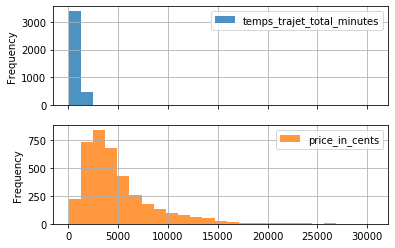

In [59]:
set_final.plot.hist(bins=25, alpha=0.8, subplots=True, grid=True)

Les temps de trajets semblent être très concentrés sur des valeurs "faibles". On peut s'en rendre compte plus facilement avec une boîte à moustaches : 

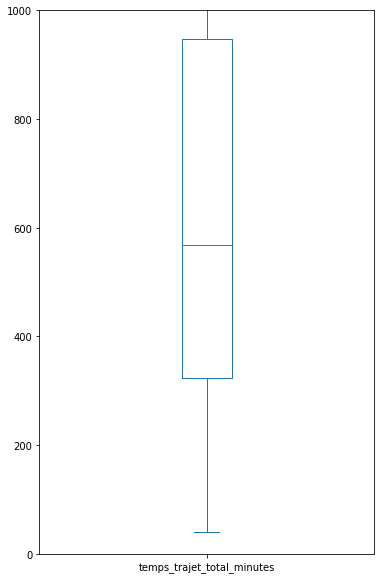

In [60]:
set_final["temps_trajet_total_minutes"].plot.box(figsize=(6, 10),ylim=(0,1000))

Ou alors en "zoomant" un peu sur ce qui se passe au début de cette répartition

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fbeb09397f0>],
      dtype=object)

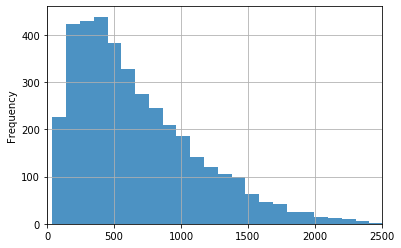

In [61]:
set_final["temps_trajet_total_minutes"].plot.hist(bins=200, alpha=0.8, subplots=True, grid=True, xlim=(0,2500))

On peut aussi s'amuser à faire quelques prédictions avec différents modèles.
Essayons par exemple de trouver le prix d'un ticket en fonction de la distance à parcourir.

In [62]:
set_final.head()

,Distances,temps_trajet_total_minutes,price_in_cents,transport_type
0,395.679504909102 km,395.000000,4050.000000,carpooling
1,91.5632172022283 km,78.190955,848.994975,carpooling
2,380.0563184098861 km,350.000000,3833.333333,carpooling
3,312.2411713856029 km,330.000000,3566.666667,carpooling
4,597.2365711629201 km,547.777778,6266.666667,carpooling


In [63]:
# We firstly convert the distances (geodesic objects) into float
set_final["Distances"]=set_final["Distances"].astype(str).str[:-3].astype(float)

In [64]:
set_final.corr()

,Distances,temps_trajet_total_minutes,price_in_cents
Distances,1.000000,0.329692,0.529410
temps_trajet_total_minutes,0.329692,1.000000,0.136902
price_in_cents,0.529410,0.136902,1.000000


In [65]:
import seaborn as sns

/Users/arthurlemerle/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


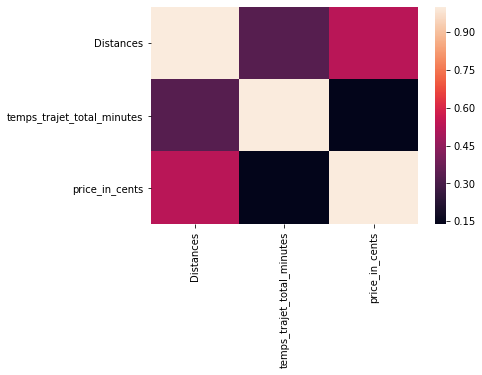

In [66]:
sns.heatmap(set_final.corr());

Etant donné la corrélation non négligeable entre la distance et le temps (ce dont on pouvait se douter), peut-être est-il préférable de ne garder que la Distance dans notre modèle prévisionnel.

In [67]:
# Set y as the target
y=set_final["price_in_cents"]

# Set X as the features
X=set_final[["Distances"]]

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
# Creation of a train set and a test set
train_X, val_X, train_y, val_y = train_test_split(X,y,test_size=0.2,random_state=1)

On peut commencer par regarder un modèle linéaire simple

In [70]:
from sklearn.linear_model import LinearRegression

/Users/arthurlemerle/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
/Users/arthurlemerle/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecati

In [71]:
reglin = LinearRegression().fit(train_X, train_y)

In [72]:
reglin.score(train_X,train_y)

0.2747360006650008

Le R2 étant assez faible, on constate que la relation Distance/Prix est loin d'être linéaire.

In [73]:
# Predict with all validation observations
val_predictions = reglin.predict(val_X)
print(val_predictions)

[ 7912.07584218  2684.81246872 11182.79293228  2421.01287977
  3840.57026905  2802.27169951  4221.6409301   5062.49282615
  8008.16967247  6751.14134761  8482.76650273  3474.81444955
  7526.25691357  5057.65085172  2408.84279007  4425.81484411
  3453.74566569  3320.97154915  1898.76153821  6153.13933882
  5720.29801765  4174.86166657  4245.94510984  5694.84560854
  3604.63851917  6771.82855274  2392.77428549  7984.90761684
  4461.93013987  2903.29412478  6211.55899751  6008.10475635
  3175.48152116  4862.20733265  8023.32709598  6981.46765843
  3474.79411566  4807.54116433  4540.43635838  5158.81153248
  3217.64072443  7283.42326531  3307.23945446  5691.55323028
  4745.8184057   4394.95455104  3217.51734729  2381.30870579
  3656.41108171  6279.63733233  4684.63240538  4785.25798932
  4241.59035439  2997.16729777  3771.78793559  3043.41408913
  3248.77507821  3851.09366323  4798.07746716  2110.46719169
  6368.82340529  2814.53320647  3843.7315072   7162.75618876
  4097.19610258  4771.31

In [74]:
# print the top few validation predictions
print(val_predictions[:5])

[ 7912.07584218  2684.81246872 11182.79293228  2421.01287977
  3840.57026905]


In [75]:
# print the top few actual prices from validation data
print(val_y.head())

952     18495.000000
685      1133.333333
1509    14346.500000
716      2426.363636
1869     9600.000000
Name: price_in_cents, dtype: float64


Les valeurs prédites n'ont pas l'air d'être proches des valeurs réelles... Calculons l'erreur absolue moyenne :

In [76]:
from sklearn.metrics import mean_absolute_error
val_mae = mean_absolute_error(val_predictions,val_y)
print(val_mae)

1980.0370708108483


Essayons alors un modèle un peu flexible qu'une régression, comme ici une forêt d'arbres décisionnels :

In [77]:
from sklearn.ensemble import RandomForestRegressor

# We define the model
rf_model = RandomForestRegressor(100,random_state=1)

# We fit the model
rf_model.fit(train_X,train_y)

# We make predictions on validation dataset
melb_preds = rf_model.predict(val_X)

# We calculate the mean absolute error of our Random Forest model on the validation data
rf_val_mae = mean_absolute_error(val_y, melb_preds)

print("Validation MAE for Random Forest Model: {}".format(rf_val_mae))

/Users/arthurlemerle/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/online_lda.py:29: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  EPS = np.finfo(np.float).eps
/Users/arthurlemerle/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/gradient_boosting.py:32: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from ._gradient_boosting

Validation MAE for Random Forest Model: 2082.05688272112


/Users/arthurlemerle/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


La moyenne des erreurs absolues n'a pas franchement été améliorée... 
Essayons de visualiser :

/Users/arthurlemerle/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


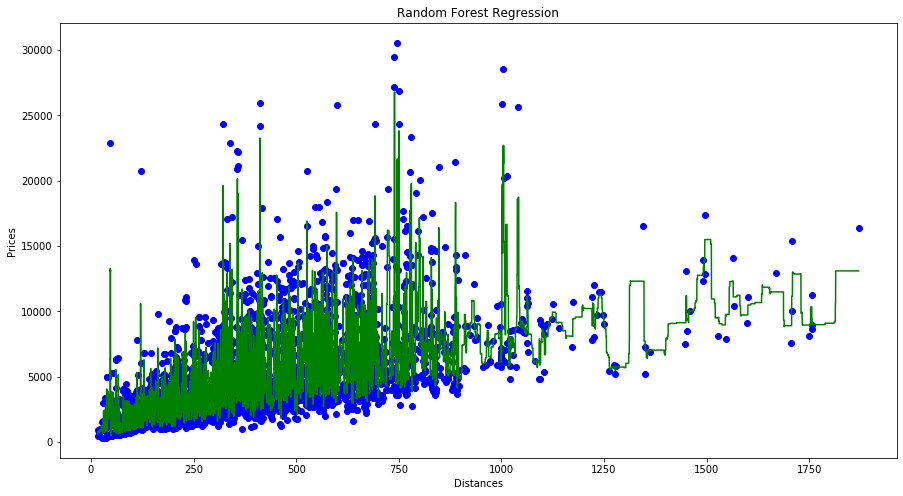

In [78]:
X_grid = np.arange(train_X.min()[0], train_X.max()[0], 0.01)
                  
X_grid = X_grid.reshape((len(X_grid), 1))
 
# Scatter plot for original data
plt.figure(1,figsize=(15,8))
plt.scatter(train_X, train_y, color = 'blue') 
 
# plot predicted data
plt.plot(X_grid, rf_model.predict(X_grid),
         color = 'green')
plt.title('Random Forest Regression')
plt.xlabel('Distances')
plt.ylabel('Prices')
plt.show()

On prend ici aussi conscience de l'énorme non-linéarité des données. Si on rajoute le temps de trajet total au modèle, voyons si on peut encore améliorer notre mean_absolute_error.

In [79]:
# We add "temps_trajet_total_minutes" to the features
X=set_final[["Distances","temps_trajet_total_minutes"]]

# We split again our data
train_X, val_X, train_y, val_y = train_test_split(X,y,test_size=0.2,random_state=1)

In [80]:
# We define the new model
rf_model2 = RandomForestRegressor(100,random_state=1)

# We fit the new model
rf_model2.fit(train_X,train_y)

# We make predictions on the validation dataset
melb_preds2 = rf_model2.predict(val_X)

# We calculate the mean absolute error of our Random Forest model on the validation data
rf_val_mae = mean_absolute_error(val_y, melb_preds2)

print("Validation MAE for Random Forest Model with 2 features: {}".format(rf_val_mae))

Validation MAE for Random Forest Model with 2 features: 1840.737136523744


/Users/arthurlemerle/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


On constate qu'on arrive cette fois à améliorer le modèle et à "fitter" un peu plus les données. 
Mais en voyant le graphe précédent, j'imagine tout de même que l'overfitting peut être très élevé...
Essayons enfin un réseau de neurones :

In [81]:
import keras

In [82]:
resneu=keras.Sequential()

In [83]:
resneu = keras.Sequential()
resneu.add(keras.layers.Dense(units = 2, activation = 'linear', input_shape=[2]))
resneu.add(keras.layers.Dense(units = 10, activation = 'relu'))
resneu.add(keras.layers.Dense(units = 10, activation = 'relu'))
resneu.add(keras.layers.Dense(units = 10, activation = 'relu'))
resneu.add(keras.layers.Dense(units = 1, activation = 'linear'))
resneu.compile(loss='mse', optimizer="adam")
resneu.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 6         
                                                                 
 dense_1 (Dense)             (None, 10)                30        
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
 dense_3 (Dense)             (None, 10)                110       
                                                                 
 dense_4 (Dense)             (None, 1)                 11        
                                                                 
Total params: 267
Trainable params: 267
Non-trainable params: 0
_________________________________________________________________


In [84]:
train_Xresneu=train_X.to_numpy()
train_yresneu=train_y.to_numpy()

resneu.fit( train_Xresneu, train_yresneu, epochs=100, verbose=1)

Epoch 1/100
97/97 [==============================] - 1s 1ms/step - loss: 35438520.0000
Epoch 2/100
97/97 [==============================] - 0s 1ms/step - loss: 23289606.0000
Epoch 3/100
97/97 [==============================] - 0s 1ms/step - loss: 17812540.0000
Epoch 4/100
97/97 [==============================] - 0s 1ms/step - loss: 17029222.0000
Epoch 5/100
97/97 [==============================] - 0s 1ms/step - loss: 16275859.0000
Epoch 6/100
97/97 [==============================] - 0s 1ms/step - loss: 15769467.0000
Epoch 7/100
97/97 [==============================] - 0s 1ms/step - loss: 15252012.0000
Epoch 8/100
97/97 [==============================] - 0s 1ms/step - loss: 14845000.0000
Epoch 9/100
97/97 [==============================] - 0s 1ms/step - loss: 14395923.0000
Epoch 10/100
97/97 [==============================] - 0s 1ms/step - loss: 13988361.0000
Epoch 11/100
97/97 [==============================] - 0s 1ms/step - loss: 13647384.0000
Epoch 12/100
97/97 [=====================

97/97 [==============================] - 0s 1ms/step - loss: 9905562.0000
Epoch 95/100
97/97 [==============================] - 0s 1ms/step - loss: 9903004.0000
Epoch 96/100
97/97 [==============================] - 0s 1ms/step - loss: 9860560.0000
Epoch 97/100
97/97 [==============================] - 0s 1ms/step - loss: 9886924.0000
Epoch 98/100
97/97 [==============================] - 0s 1ms/step - loss: 9873329.0000
Epoch 99/100
97/97 [==============================] - 0s 1ms/step - loss: 9846569.0000
Epoch 100/100
97/97 [==============================] - 0s 1ms/step - loss: 9854749.0000


In [85]:
val_Xresneu=val_X.to_numpy()
val_yresneu=val_y.to_numpy()

In [86]:
y_predictions=resneu.predict(val_Xresneu)

In [87]:
mae_resneu=mean_absolute_error(val_yresneu,y_predictions)
print(mae_resneu)

1921.3723331696142


On constate que notre réseau de neurones -construit totalement au hasard, je dois l'admettre- a des performances équivalentes à notre forêt d'arbres décisionnels. Sans doute lui faudrait-il plus d'entrainement et une "meilleure" architecture pour gagner en performance.

Il y a évidemment énormément de choses qu'on aurait pu faire différemment sur les prédictions ci-dessus : travailler par type de moyen de transport (d'ailleurs sans doute plus judicieux je pense), ou inclure directement le moyen de transport comme prédicteur. 